### Audio Processing Terminologies

#### Some Terminologies

1. Audio speech signal:  The speech which usually is uttered by humans and is propogated through air.
2. Digital speech signal: The speech (in terms of samples) after performing analog to digital conversion using ADC device. In this form, speech signal is in form of digitzed samples
3. Frequency of Signal: The number of cycles a signal repeats in 1 sec duration
4. Amplitude of a signal : It is related to loudness of speech (for speech signal). Depending on the type of the signal, it can be energy, voltage etc.



In [12]:
# Importing Packages

from scipy.io import wavfile #for scientific and signal processing
from matplotlib import pyplot as plt #visualization
import numpy as np # for array processing
%matplotlib inline


In [4]:
#Check the list of directories and files 
import os
os.listdir('../')


['.git',
 'Audio Processing',
 'INMP441.pdf',
 'README.md',
 'sample',
 'SoundWaves']

In [7]:
# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('../SoundWaves/dog.wav')
print('Sample rate of the signal:',samplerate,"Hz")
print('Contents of the signal:',data)
print('Length of the signal:',len(data))

Sample rate of the signal: 22050 Hz
Contents of the signal: [  0  -1  -1 ...  51  95 158]
Length of the signal: 52128


In [8]:
# Install the pydub library 

# Check that kernel Internet is connected before running this cell
! pip install pydub


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Play an audio file

from pydub import AudioSegment
import IPython

IPython.display.Audio(data, rate=samplerate)

In [11]:
times = np.arange(len(data))/float(samplerate) # Calculate the duration of the signal

# How times is different from data?
print('Minimum time (sec):', min(times))
print('Maximum time (sec):', max(times))
print('Minimum data point value:', min(data))
print('Maximum data point value:', max(data))

duration = len(data)/float(samplerate)

print('Duration of the audio in seconds: {:.2f}'.format(duration))

print('Number of samples:',len(data))

Minimum time (sec): 0.0
Maximum time (sec): 2.364036281179138
Minimum data point value: -32768
Maximum data point value: 32767
Duration of the audio in seconds: 2.36
Number of samples: 52128


### Plot the raw signal (i.e. audio waveform)

This is a time domain representation of an audio signal, where only time and corresponding amplitude information is available. This kind of representation does not provide much information.

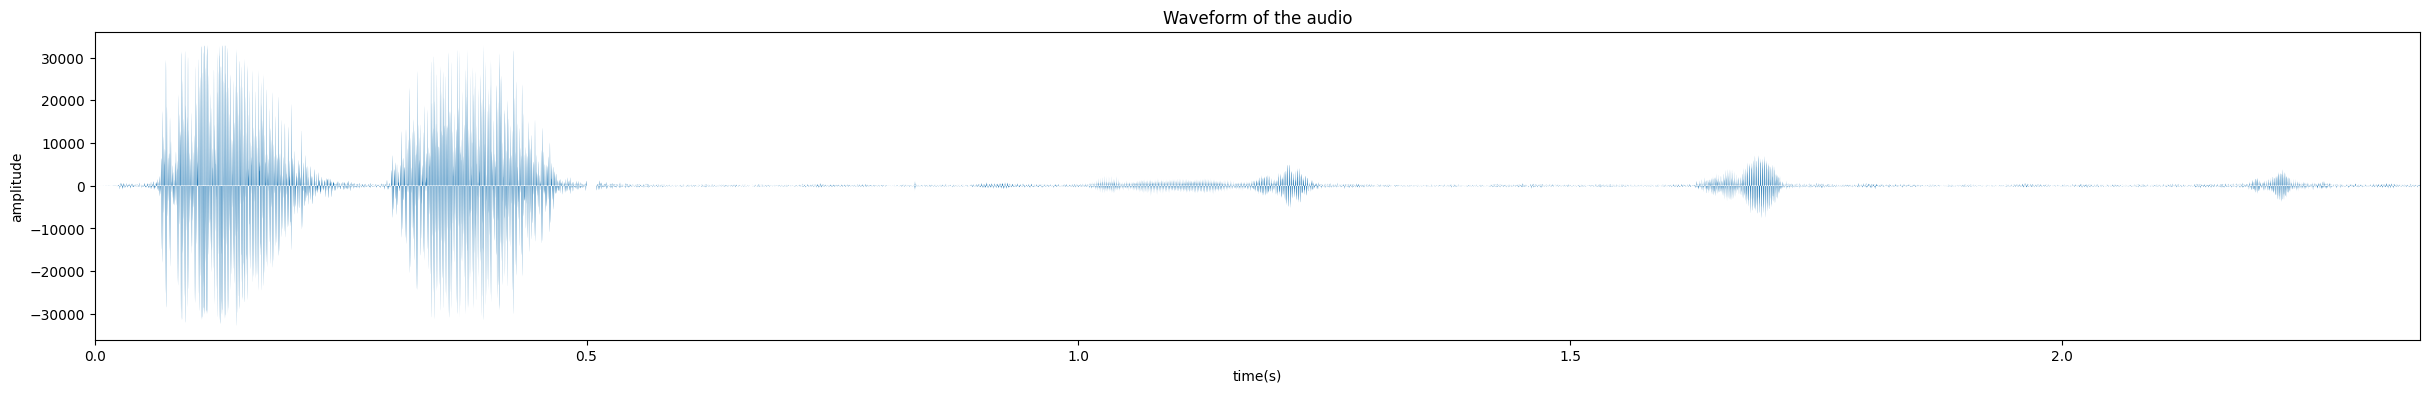

In [19]:
# Time domain representation
# Make the plot

plt.figure(figsize=(30,4))

plt.fill_between(times, data)
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.xlim(times[0], times[-1])
plt.title('Waveform of the audio')

plt.show()

# You can set the format by changing the extension
# like .pdf, .svg, .eps
#plt.savefig('plot_scipy_audio.png', dpi=300)

### Plot Frequency Spectrum

In order to obtain additional information, it is recommended to transform the signal from time domain to frequency domain. This is accomplished by Fourier Transform. For dealing with audio signals, usually short-time Fourier transform (STFT) is used. This process calculates the Fourier series coefficients to represent the signal which helps in capturing the frequency component based information also from the signal.

It is therefore possible to detect the characterstic of the signal i.e. whether it is single tone signal, or dual tone signal or a composite signal comprising multiple frequencies. All major signal processing algorithms apply STFT as a preprocessing so that they can be applied to the signal directly.

You can see that time domain representation displays only time and amplitude (i.e. loudness) values, whereas frequency domain represents time and frequency based information.

In real life, audio signals are made up of multiple frequencies and their frequency spectrum is not naive like this one. The following graph illustrates the spectrum of our input audio signal which has lot of spikes at different frequencies indicating the complexity of the signal.

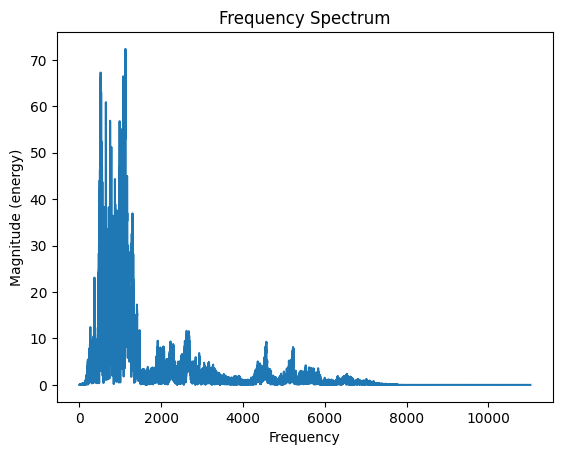

In [20]:
# Plotting the Frequency Spectrum of the signal

[a,b,c] = plt.magnitude_spectrum(data,Fs=samplerate)

# display the plot

plt.title('Frequency Spectrum')
plt.show()

### Draw Spectrogram

Spectrogram is an alternative visualization of audio signal in frequency domain which provides three dimensional information of the signal simultaneously i.e. time, frequency and amplitude.

A spectrogram is read from bottom to top.

1. The horizontal axis represents the time dimension.
2. The vertical axis represents the frequency dimension.
3. The third (loudness) dimension is reflected by the color of the spectrogram. Dark color indicates no sound (silence) region, and otherwise color changes from bright to dark depending on the frequency components present in the signal at a specific time stamp.

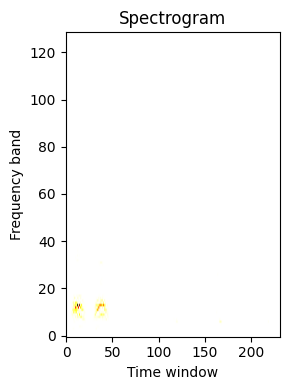

In [26]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(data)

plt.figure(figsize=(3, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

### Second Method: Using Librosa

Now, we will see the usage of Librosa library for preliminary audio processing.

Librosa is a very well-versed library for audio analysis and processing in Python. You can get more information about its functionalities from the link : https://librosa.org/doc/latest/index.html


In [29]:
! pip install librosa

   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   --------------------- ------------------ 143.4/260.7 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 260.7/260.7 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.7 kB ? eta -:--:--
   ---------------------------------------- 72.7/72.7 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.7 MB 2.8 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.7 MB 3.2 MB/s eta 0:00:01
   ------ --------------------------------- 0.5/2.7 MB 3.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.6/2.7 MB 3.2 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 3.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.7 MB 3.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.2/2.7 MB 3.5 MB/s eta 0:00:01
   -----------------

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\Scripts\\numba'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install librosa



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)


In [34]:
import librosa

import librosa

audio_path = '../SoundWaves/dog.wav'

x , sr = librosa.load(audio_path)

print("Sample rate:",sr)
print("Duration of the signal in seconds: {:.2f}".format(len(x)/sr))


Sample rate: 22050
Duration of the signal in seconds: 2.36


In [35]:
import IPython.display as ipd
ipd.Audio(audio_path)

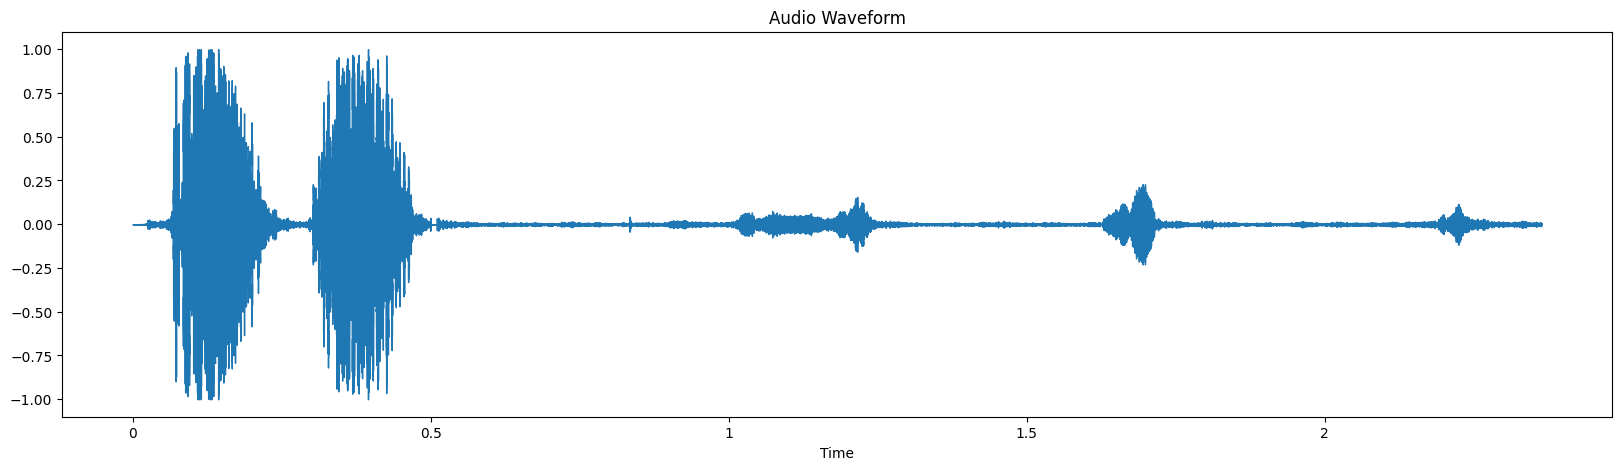

In [36]:
import librosa.display

plt.figure(figsize=(20, 5))
plt.title('Audio Waveform')
librosa.display.waveshow(x, sr=sr)

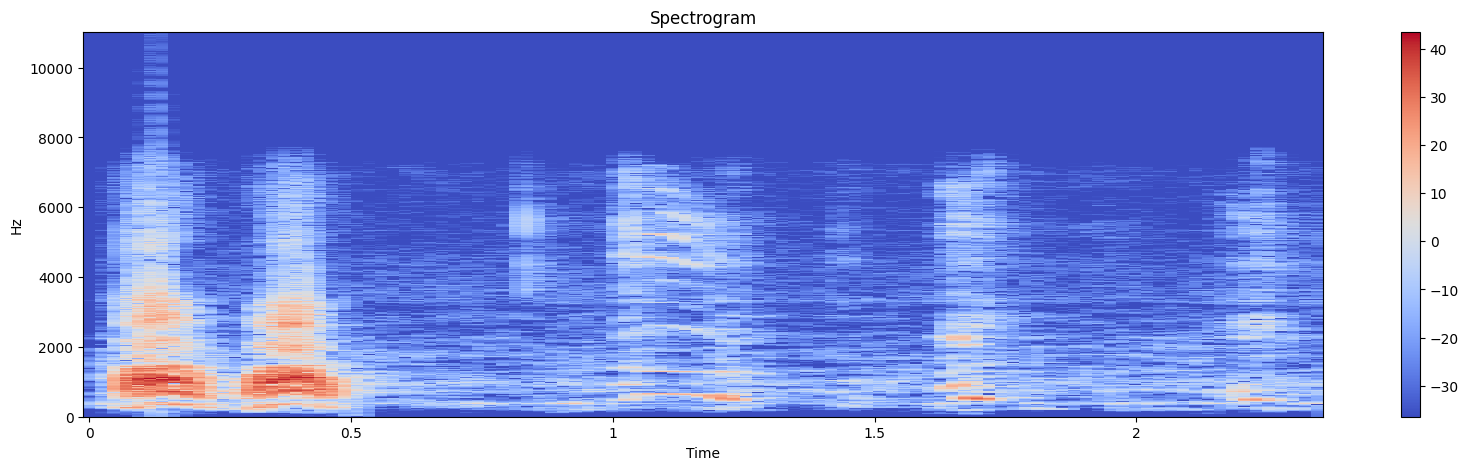

In [37]:
# This is spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectrogram')
plt.colorbar()